In [24]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [25]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [26]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [27]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [28]:
# Drop the i row containing NULL value
df_airline.dropna(axis=0,inplace=True)

In [29]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [30]:
# COnvert  the month column to date time type
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [31]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [32]:
# Set the month COlumn as Index
df_airline.set_index('Month', inplace=True)

In [33]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

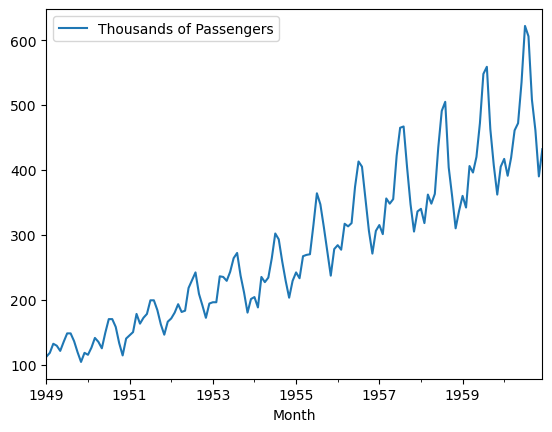

In [34]:
# Plotting the data
df_airline.plot()

## Dickey Fuller Test

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
# Create a function for Dickey Fuller Test

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong Evidence against the Null Hypothesis")
        print("Reject the Null Hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Week Evidence against the Null Hypothesis")
        print("Time series has a unit root")
        print("Indicating it is non-stationary")

In [37]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060547
p-value: 0.9918802434376411
Week Evidence against the Null Hypothesis
Time series has a unit root
Indicating it is non-stationary


## DIfferencing Techniques
Used to make the data stationary

In [38]:
df_airline['Passengers shift by 1'] = df_airline['Thousands of Passengers'].shift(1)

In [39]:
df_airline['Passengers First Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)
                                                            

In [40]:
df_airline.head()

,Thousands of Passengers,Passengers shift by 1,Passengers First Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,112.0,6.0
1949-03-01,132.0,118.0,14.0
1949-04-01,129.0,132.0,-3.0
1949-05-01,121.0,129.0,-8.0


In [41]:
# Perform the Dickey Fuller test again to check whether the differencing is stationary

adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824170004
p-value: 0.05421329028382491
Week Evidence against the Null Hypothesis
Time series has a unit root
Indicating it is non-stationary


In [42]:
# Performing the 2nd differencing
df_airline['Passengers shift by 2'] = df_airline['Thousands of Passengers'].shift(2)

In [71]:
df_airline['Passengers second Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(2)
                                                            

In [45]:
df_airline.head()

,Thousands of Passengers,Passengers shift by 1,Passengers First Difference,Passengers shift by 2,Passengers second Difference
Month,,,,,
1949-01-01,112.0,NaN,NaN,NaN,NaN
1949-02-01,118.0,112.0,6.0,NaN,NaN
1949-03-01,132.0,118.0,14.0,112.0,20.0
1949-04-01,129.0,132.0,-3.0,118.0,11.0
1949-05-01,121.0,129.0,-8.0,132.0,-11.0


In [72]:
# Perform the Dickey Fuller test again to check whether the differencing is stationary

adf_test(df_airline['Passengers second Difference'].dropna())

ADF Statistics: -2.9616951355554306
p-value: 0.03862975767698775
Strong Evidence against the Null Hypothesis
Reject the Null Hypothesis
Data has no unit root and is stationary


In [47]:
# Get the seasonal differencing that is of 12 months
df_airline['Passengers shift by 12'] = df_airline['Thousands of Passengers'].shift(12)


df_airline['Passengers 12 Difference'] = df_airline['Thousands of Passengers'] - df_airline['Passengers shift by 12']

df_airline.head()
                                                            

,Thousands of Passengers,Passengers shift by 1,Passengers First Difference,Passengers shift by 2,Passengers second Difference,Passengers shift by 12,Passengers 12 Difference
Month,,,,,,,
1949-01-01,112.0,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118.0,112.0,6.0,NaN,NaN,NaN,NaN
1949-03-01,132.0,118.0,14.0,112.0,20.0,NaN,NaN
1949-04-01,129.0,132.0,-3.0,118.0,11.0,NaN,NaN
1949-05-01,121.0,129.0,-8.0,132.0,-11.0,NaN,NaN


In [48]:
# Perform the Dickey Fuller test again to check whether the differencing is stationary

adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924814
p-value: 0.011551493085514952
Strong Evidence against the Null Hypothesis
Reject the Null Hypothesis
Data has no unit root and is stationary


## ACF(Auto Corelation) and PACF(Partial Auto Correlation) plot

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

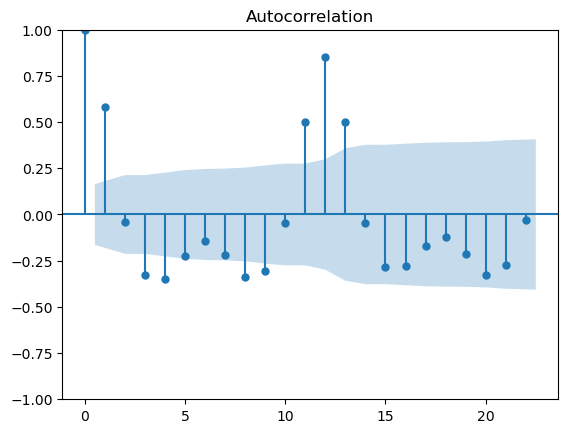

In [53]:
acf2 = plot_acf(df_airline["Passengers second Difference"].dropna())

 We look for the value for variable 'q' which is the number of points which outside the upper and lower bound of acf plot. So for the upper plot the value of 'q = 8' and we can see clearly the data is Seasonal.

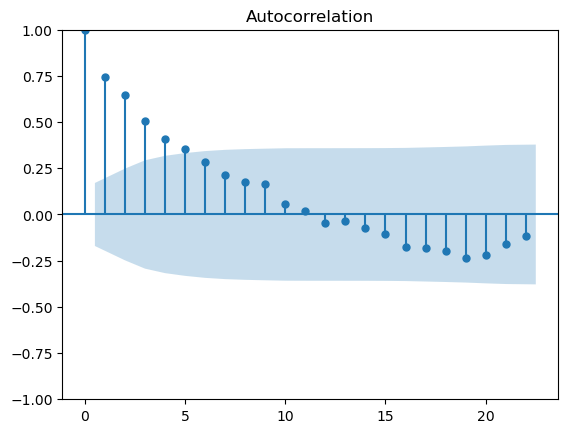

In [54]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())

Here the value for variable 'q = 4'

With ACF we are performing Moving Average

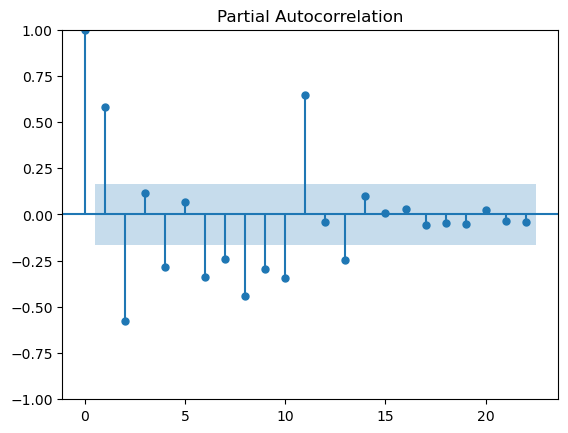

In [55]:
# PACF plot
pacf2 = plot_pacf(df_airline["Passengers second Difference"].dropna())

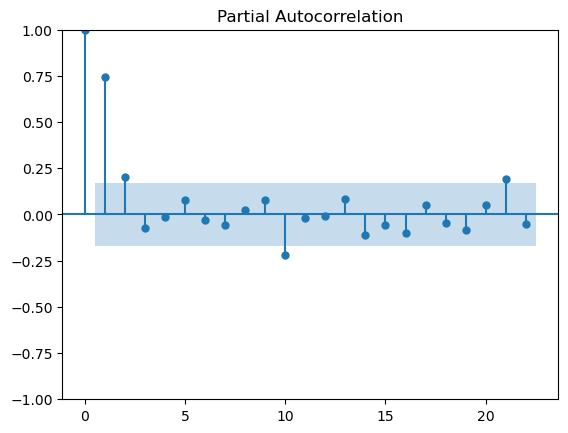

In [56]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

We can see that with 12 month differencing there is no seasonality

With PACF we are performing Auto Regression and we find the value of variable 'P' which is similar to variable 'q' in ACF, the number of points beyond the upper and lower limit. 

## Splitting the data into train and test

In [60]:
df_airline.columns

Index(['Thousands of Passengers', 'Passengers shift by 1',
       'Passengers First Difference', 'Passengers shift by 2',
       'Passengers second Difference', 'Passengers shift by 12',
       'Passengers 12 Difference'],
      dtype='object')

In [61]:
# Removing the unnecessary columns from the dataframe
df = df_airline.drop(["Passengers shift by 1", "Passengers shift by 2",
                     "Passengers shift by 12"], axis = 1)

df

,Thousands of Passengers,Passengers First Difference,Passengers second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,20.0,NaN
1949-04-01,129.0,-3.0,11.0,NaN
1949-05-01,121.0,-8.0,-11.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,71.0,47.0
1960-09-01,508.0,-98.0,-114.0,45.0
1960-10-01,461.0,-47.0,-145.0,54.0


In [62]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960, 12,1)


In [64]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days = 1): test_dataset_end]

In [70]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,47.0,42.0
1956-02-01,277.0,-7.0,-1.0,44.0
1956-03-01,317.0,40.0,33.0,50.0
1956-04-01,313.0,-4.0,36.0,44.0
1956-05-01,318.0,5.0,1.0,48.0
1956-06-01,374.0,56.0,61.0,59.0
1956-07-01,413.0,39.0,95.0,49.0
1956-08-01,405.0,-8.0,31.0,58.0
1956-09-01,355.0,-50.0,-58.0,43.0


## ARIMA Model

In [75]:
## create a ARIMA model
import statsmodels.api as sm

In [85]:
model_Arima = sm.tsa.arima.ARIMA(train_data["Thousands of Passengers"],
                                 order = (4,2,3))

# Order contains the value of p,d, q respectivefy which we provide explicilty based on the observation made by the plot
# p = 10 
# q = 12 Spike in the plot at the point
# d = 2 as we have done 2 differencing here

C:\Users\subit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\subit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\subit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [86]:
model_arima_fit = model_Arima.fit()

C:\Users\subit\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(4, 2, 3)   Log Likelihood                -355.973
Date:                     Wed, 22 May 2024   AIC                            727.946
Time:                             16:08:46   BIC                            747.200
Sample:                         01-01-1949   HQIC                           735.676
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3345      0.134     -2.495      0.013      -0.597      -0.072
ar.L2         -0.8518      0.135     -6.328      0.000      -1.116      -0.588
ar.L3          0.1168      0.135      0.863      0.388      -0.148       0.382
ar.L4         -0.4218      0.135     -3.132      0.002      -0.686      -0.158
ma.L1         -0.2997     39.779     -0.008      0.994     -78.265      77.666
ma.L2          0.2876     27.850      0.010      0.992     -54.298      54.874
ma.L3         -0.9877     39.358     -0.025      0.980     -78.128      76.153
sigma2       307.1639   1.22e+04      0.025      0.980   -2.37e+04    2.43e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.62   Prob(JB):                         0.78
Heteroskedasticity (H):               3.64   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
## Prediction

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [89]:
pred_model = model_arima_fit.predict(start = pred_start_date,
                                    end = pred_end_date)
residuals = test_data['Thousands of Passengers'] -pred_model

In [90]:
pred_model

1956-01-01    302.769017
1956-02-01    293.171584
1956-03-01    300.872607
1956-04-01    297.266704
1956-05-01    285.541016
1956-06-01    302.677891
1956-07-01    308.459703
1956-08-01    297.275424
1956-09-01    308.234121
1956-10-01    312.737888
1956-11-01    303.347483
1956-12-01    313.844949
1957-01-01    319.431541
1957-02-01    310.820312
1957-03-01    319.324292
1957-04-01    325.235017
1957-05-01    317.847708
1957-06-01    325.104737
1957-07-01    331.268704
1957-08-01    324.865053
1957-09-01    330.915483
1957-10-01    337.200699
1957-11-01    331.792334
1957-12-01    336.850756
1958-01-01    343.143099
1958-02-01    338.642435
1958-03-01    342.855512
1958-04-01    349.076691
1958-05-01    345.422895
1958-06-01    348.931735
1958-07-01    355.015362
1958-08-01    352.136363
1958-09-01    355.063760
1958-10-01    360.962881
1958-11-01    358.789373
1958-12-01    361.243245
1959-01-01    366.923519
1959-02-01    365.386777
1959-03-01    367.461197
1959-04-01    372.900170


In [91]:
residuals

Month
1956-01-01    -18.769017
1956-02-01    -16.171584
1956-03-01     16.127393
1956-04-01     15.733296
1956-05-01     32.458984
1956-06-01     71.322109
1956-07-01    104.540297
1956-08-01    107.724576
1956-09-01     46.765879
1956-10-01     -6.737888
1956-11-01    -32.347483
1956-12-01     -7.844949
1957-01-01     -4.431541
1957-02-01     -9.820312
1957-03-01     36.675708
1957-04-01     22.764983
1957-05-01     37.152292
1957-06-01     96.895263
1957-07-01    133.731296
1957-08-01    142.134947
1957-09-01     73.084517
1957-10-01      9.799301
1957-11-01    -26.792334
1957-12-01     -0.850756
1958-01-01     -3.143099
1958-02-01    -20.642435
1958-03-01     19.144488
1958-04-01     -1.076691
1958-05-01     17.577105
1958-06-01     86.068265
1958-07-01    135.984638
1958-08-01    152.863637
1958-09-01     48.936240
1958-10-01     -1.962881
1958-11-01    -48.789373
1958-12-01    -24.243245
1959-01-01     -6.923519
1959-02-01    -23.386777
1959-03-01     38.538803
1959-04-01     23.0

<Axes: ylabel='Density'>

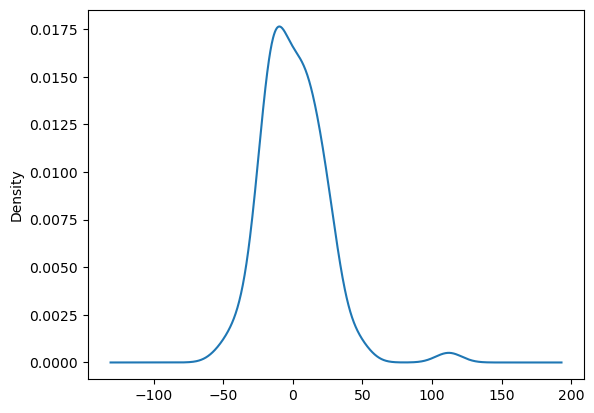

In [83]:
model_arima_fit.resid.plot(kind = 'kde')

In [92]:
# create a new col with predicted value of test data
test_data["Predicted_ARIMA"] = pred_model

C:\Users\subit\AppData\Local\Temp\ipykernel_21680\3265189664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted_ARIMA"] = pred_model


<Axes: xlabel='Month'>

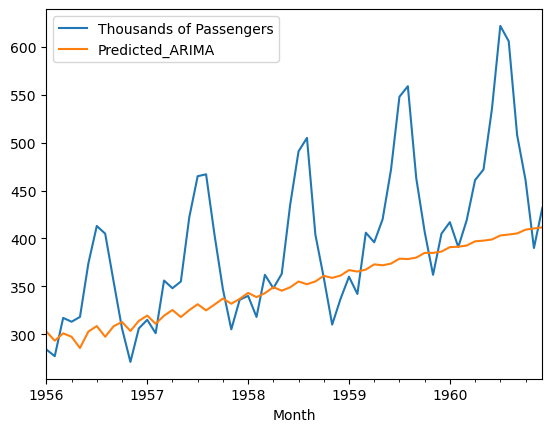

In [93]:
# Plotting the actual and predicted values
test_data[["Thousands of Passengers", "Predicted_ARIMA"]].plot()

We can see that there is a huge difference between predicted and actual value. That means ARIMA model doesn't work well with seasonal data

## SARIMA model

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [100]:
model_SARIMA = SARIMAX(train_data["Thousands of Passengers"],
                                  order = (3,0,5),seasonal_order=(0,1,0,12))

# seasonal_order contains the value of p,d,q and seasonal number respecitvely
# p = 0
# d = 1
# q= 0
# seasonal = 12

C:\Users\subit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\subit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [101]:
model_sarima_fit = model_SARIMA.fit()

C:\Users\subit\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [102]:
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Wed, 22 May 2024   AIC                            548.481
Time:                                     16:21:41   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5988      0.938      0.639      0.523      -1.239       2.437
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4531      0.894     -0.507      0.612      -2.205       1.299
ma.L1          0.1832      1.164      0.157      0.875      -2.099       2.465
ma.L2         -0.5346      1.262     -0.424      0.672      -3.008       1.939
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.533
ma.L5          0.2472      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7283     81.079      1.082      0.279     -71.183     246.640
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
# Prediction
pred_sarima = model_sarima_fit.predict(start = pred_start_date,
                                    end = pred_end_date)
residuals_sarima = test_data['Thousands of Passengers'] -pred_sarima

In [107]:
pred_sarima

1956-01-01    286.187065
1956-02-01    281.278436
1956-03-01    309.918612
1956-04-01    310.678700
1956-05-01    311.335396
1956-06-01    354.950525
1956-07-01    403.397643
1956-08-01    385.071015
1956-09-01    349.444485
1956-10-01    310.217119
1956-11-01    272.562429
1956-12-01    312.434071
1957-01-01    319.957354
1957-02-01    314.009977
1957-03-01    341.987618
1957-04-01    341.788306
1957-05-01    341.790420
1957-06-01    384.516300
1957-07-01    432.321503
1957-08-01    413.167916
1957-09-01    376.915522
1957-10-01    336.916843
1957-11-01    298.654726
1957-12-01    337.805079
1958-01-01    344.741007
1958-02-01    338.117585
1958-03-01    365.528982
1958-04-01    364.694779
1958-05-01    364.152342
1958-06-01    406.280964
1958-07-01    453.563538
1958-08-01    433.847272
1958-09-01    397.094125
1958-10-01    356.564676
1958-11-01    317.823433
1958-12-01    356.472578
1959-01-01    362.950600
1959-02-01    355.853449
1959-03-01    382.827641
1959-04-01    381.545332


In [108]:
residuals_sarima

Month
1956-01-01     -2.187065
1956-02-01     -4.278436
1956-03-01      7.081388
1956-04-01      2.321300
1956-05-01      6.664604
1956-06-01     19.049475
1956-07-01      9.602357
1956-08-01     19.928985
1956-09-01      5.555515
1956-10-01     -4.217119
1956-11-01     -1.562429
1956-12-01     -6.434071
1957-01-01     -4.957354
1957-02-01    -13.009977
1957-03-01     14.012382
1957-04-01      6.211694
1957-05-01     13.209580
1957-06-01     37.483700
1957-07-01     32.678497
1957-08-01     53.832084
1957-09-01     27.084478
1957-10-01     10.083157
1957-11-01      6.345274
1957-12-01     -1.805079
1958-01-01     -4.741007
1958-02-01    -20.117585
1958-03-01     -3.528982
1958-04-01    -16.694779
1958-05-01     -1.152342
1958-06-01     28.719036
1958-07-01     37.436462
1958-08-01     71.152728
1958-09-01      6.905875
1958-10-01      2.435324
1958-11-01     -7.823433
1958-12-01    -19.472578
1959-01-01     -2.950600
1959-02-01    -13.853449
1959-03-01     23.172359
1959-04-01     14.4

<Axes: ylabel='Density'>

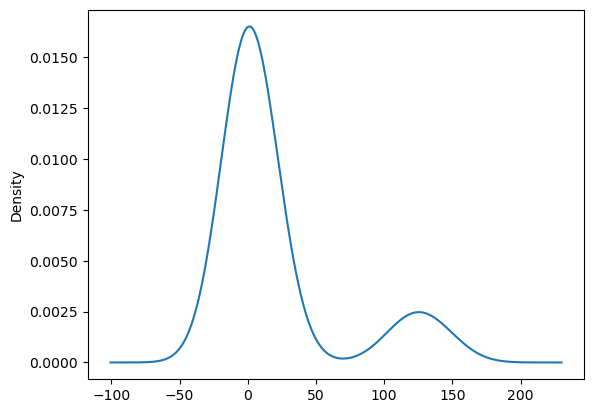

In [109]:
model_sarima_fit.resid.plot(kind = 'kde')

In [110]:
# create a new col with predicted value of test data
test_data["Predicted_SARIMA"] = pred_sarima

C:\Users\subit\AppData\Local\Temp\ipykernel_21680\1404479162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted_SARIMA"] = pred_sarima


<Axes: xlabel='Month'>

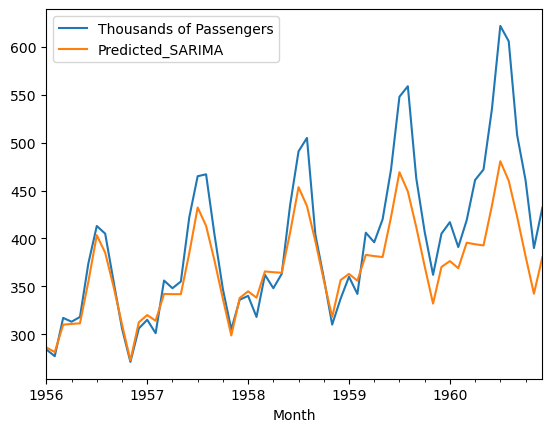

In [114]:
# Plotting the actual and predicted values
test_data[["Thousands of Passengers", "Predicted_SARIMA"]].plot()

We can see now there is less difference between predicted and actual value